# MADE Advanced ML, Homework 3

In [1]:
import re
import random
from collections import Counter
from copy import copy
from tqdm import tqdm

import numpy as np
from nltk import ngrams, FreqDist

random.seed(42)

PATH_WAR = "./corpora/WarAndPeace.txt"
PATH_ANNA = "./corpora/AnnaKarenina.txt"


1. Реализуйте базовый частотный метод по Шерлоку Холмсу:

 - подсчитайте частоты букв по корпусам (пунктуацию и капитализацию можно просто опустить, а вот пробелы лучше оставить);

 - возьмите какие-нибудь тестовые тексты (нужно взять по меньшей мере 2-3 предложения, иначе вряд ли сработает), зашифруйте их посредством случайной перестановки символов;

 - расшифруйте их таким частотным методом.


In [2]:
ALPHABET = "абвгдеёжзийклмнопрстуфхцчшщъыьэюя "

with open(PATH_ANNA, "r", encoding="utf-8") as ak_text, open(PATH_WAR, "r", encoding="utf-8") as wap_text:
    text = ak_text.read().lower() + "\n" + wap_text.read().lower()
text = re.sub(f"[^{ALPHABET}]", "", text)
text = re.sub(" +", " ", text)

In [3]:
class FreqDecoder:
    def __init__(self, n=1, alphabet=None):
        self.n = n
        self.alphabet = alphabet or "абвгдеёжзийклмнопрстуфхцчшщъыьэюя "
        self.freq_alphabet = None

    def get_ngrams(self, text, step=1):
        return [text[i : i + self.n] for i in range(0, len(text) - self.n + 1, step)]

    def get_n_gramm_freq(self, text, step):
        text = self._preprocess(text)
        n_grams = self.get_ngrams(text)
        letter_count = Counter(n_grams)
        n_gramm_freq = dict(
            sorted(
                letter_count.items(), key=lambda item: item[1], reverse=True
            )
        )
        return n_gramm_freq


    def _preprocess(self, text):
        text = re.sub(f"[^{self.alphabet}]", "", text)
        text = re.sub(" +", " ", text)
        return text

    def get_freq_alphabet(self, text, step=1):
        letter_freq = self.get_n_gramm_freq(text, step)
        freq_alphabet = [letter for letter in list(letter_freq.keys())]
        return freq_alphabet

    def fit(self, text):
        self.freq_alphabet = self.get_freq_alphabet(text)


    def _encode(self, text):
        text = self._preprocess(text)
        permutation = "".join(random.sample(self.alphabet, len(self.alphabet)))
        transtable = str.maketrans(self.alphabet, permutation)
        encoded_text = text.lower().translate(transtable)
        return encoded_text

    def decode(self, text_encoded):
        text = text_encoded + " " * (len(text_encoded) % self.n)
        text_freq_alphabet = self.get_freq_alphabet(text, step=self.n)
        transtable = {
            text_freq_alphabet[i]: self.freq_alphabet[i]
            for i in range(
                min(len(text_freq_alphabet), len(self.freq_alphabet))
            )
        }
        decoded_text = "".join(
            [transtable.get(i, " ") for i in self.get_ngrams(text, step=self.n)]
        )[:len(text_encoded)]
        return decoded_text

    @staticmethod
    def accuracy(orig_text, decoded_text):
        return (
            np.array(list(orig_text)) == np.array(list(decoded_text))
        ).sum() / len(orig_text)

    def get_encode_decode_report(self, test_text, silent=False):
        text_encoded = self._encode(test_text)
        text_decoded = self.decode(text_encoded)
        dec_accuracy = FreqDecoder.accuracy(test_text, text_decoded)
        if not silent:
            print(f"{'='*15} ИСХОДНЫЙ ТЕКСТ {'='*15}")
            print(test_text)
            print(f"{'='*15} ЗАКОДИРОВАННЫЙ ТЕКСТ {'='*15}")
            print(text_encoded)
            print(f"{'='*15} ДЕКОДИРОВАННЫЙ ТЕКСТ {'='*15}")
            print(text_decoded)
        print(f"{'='*15} accuracy = {round(dec_accuracy, 2)} {'='*15}")

In [4]:
freq_dec = FreqDecoder()
freq_dec.fit(text)

In [9]:
ind = 424242
test_text = text[ind:ind+1000]
#print(test_text)

In [7]:
test_text_modern = """
Зло неистребимо. Никакой человек не способен уменьшить его количество в мире. \
Он может несколько улучшить свою собственную судьбу, но всегда за счет \
ухудшения судьбы других. И всегда будут короли, более или менее жестокие, \
бароны, более или менее дикие, и всегда будет невежественный народ, питающий \
восхищение к своим угнетателям и ненависть к своему освободителю. И все потому, \
что раб гораздо лучше понимает своего господина, пусть даже самого жестокого, \
чем своего освободителя, ибо каждый раб отлично представляет себя на месте господина, \
но мало кто представляет себя на месте бескорыстного освободителя. \
Таковы люди, дон Румата, и таков наш мир.
""".lower()
test_text_modern = re.sub(f'[^{ALPHABET}]', '', test_text_modern)
test_text_modern = re.sub(" +", " ", test_text_modern)

In [6]:
freq_dec.get_encode_decode_report(test_text)

=============== ИСХОДНЫЙ ТЕКСТ ===============
слишком страшно понять свое настоящее положение и он в душе своей закрыл запер и запечатал тот ящик в котором у него находились его чувства к семье то есть к жене и сыну он внимательный отец с конца этой зимы стал особенно холоден к сыну и имел к нему то же подтрунивающее отношение как и к жене а молодой человек обращался он к немуалексей александрович думал и говорил что ни в какой год у него не было столько служебного дела как в нынешний но он не сознавал того что он сам выдумывал себе в нынешнем году дела что это было одно из средств не открывать того ящика где лежали чувства к жене и семье и мысли о них и которые делались тем страшнее чем дольше они там лежали если бы ктонибудь имел право спросить алексея александровича что он думает о поведении своей жены то кроткий смирный алексей александрович ничего не ответил бы а очень бы рассердился на того человека который у него спросил бы про это от этогото и было в выражении лица алексея але

In [8]:
freq_dec.get_encode_decode_report(test_text_modern)

=============== ИСХОДНЫЙ ТЕКСТ ===============
зло неистребимо никакой человек не способен уменьшить его количество в мире он может несколько улучшить свою собственную судьбу но всегда за счет ухудшения судьбы других и всегда будут короли более или менее жестокие бароны более или менее дикие и всегда будет невежественный народ питающий восхищение к своим угнетателям и ненависть к своему освободителю и все потому что раб гораздо лучше понимает своего господина пусть даже самого жестокого чем своего освободителя ибо каждый раб отлично представляет себя на месте господина но мало кто представляет себя на месте бескорыстного освободителя таковы люди дон румата и таков наш мир
=============== ЗАКОДИРОВАННЫЙ ТЕКСТ ===============
лтнобйъшфьйиъзнобъцрцнкоейтнмйцобйош ншнийбоузйбжпъфжойэноцнтъейшфмномозъьйонбознвйфобйшцнтжцноутуепъфжошмнёошнишфмйббуёошучжиуобномшйэчролрошейфоуыучпйбъюошучжихочьуэъыоъомшйэчроиучуфоцньнтъоинтййоътъозйбййовйшфнцъйоирьнбхоинтййоътъозйбййочъцъйоъомшйэчроиучйфобймйв

2. Вряд ли в результате получилась такая уж хорошая расшифровка, разве что если вы брали в качестве тестовых данных целые рассказы. Но и Шерлок Холмс был не так уж прост: после буквы E, которая действительно выделяется частотой, дальше он анализировал уже конкретные слова и пытался угадать, какими они могли бы быть. Я не знаю, как запрограммировать такой интуитивный анализ, так что давайте просто сделаем следующий логический шаг:

 - подсчитайте частоты биграмм (т.е. пар последовательных букв) по корпусам;
  - проведите тестирование аналогично п.1, но при помощи биграмм.


In [10]:
freq_dec_bigram = FreqDecoder(n=2)
freq_dec_bigram.fit(text)

In [11]:
freq_dec_bigram.get_encode_decode_report(test_text)

=============== ИСХОДНЫЙ ТЕКСТ ===============
слишком страшно понять свое настоящее положение и он в душе своей закрыл запер и запечатал тот ящик в котором у него находились его чувства к семье то есть к жене и сыну он внимательный отец с конца этой зимы стал особенно холоден к сыну и имел к нему то же подтрунивающее отношение как и к жене а молодой человек обращался он к немуалексей александрович думал и говорил что ни в какой год у него не было столько служебного дела как в нынешний но он не сознавал того что он сам выдумывал себе в нынешнем году дела что это было одно из средств не открывать того ящика где лежали чувства к жене и семье и мысли о них и которые делались тем страшнее чем дольше они там лежали если бы ктонибудь имел право спросить алексея александровича что он думает о поведении своей жены то кроткий смирный алексей александрович ничего не ответил бы а очень бы рассердился на того человека который у него спросил бы про это от этогото и было в выражении лица алексея але

In [13]:
freq_dec_bigram.get_encode_decode_report(test_text_modern)

=============== ИСХОДНЫЙ ТЕКСТ ===============
зло неистребимо никакой человек не способен уменьшить его количество в мире он может несколько улучшить свою собственную судьбу но всегда за счет ухудшения судьбы других и всегда будут короли более или менее жестокие бароны более или менее дикие и всегда будет невежественный народ питающий восхищение к своим угнетателям и ненависть к своему освободителю и все потому что раб гораздо лучше понимает своего господина пусть даже самого жестокого чем своего освободителя ибо каждый раб отлично представляет себя на месте господина но мало кто представляет себя на месте бескорыстного освободителя таковы люди дон румата и таков наш мир
=============== ЗАКОДИРОВАННЫЙ ТЕКСТ ===============
чыежмгзшоюгпзиежмзй йеуждгыеагйжмгжшнешепгмжлигмёкзоёжгфежйеыздгшоаежажизюгжемжиергожмгшйеыёйежлылдкзоёжшаесжшепшоагммлсжшлцёплжмежашгфц жч жшдгожлщлцкгмзьжшлцёптжцюлфзщжзжашгфц жплцложйеюеызжпеыггжзызжигмггжргшоейзгжп юемтжпеыггжзызжигмггжцзйзгжзжашгфц жплцгожмгагр

In [15]:
ind = 40000
test_text_large = text[ind:ind+100000]
freq_dec_bigram.get_encode_decode_report(test_text_large, silent=True)

=============== accuracy = 0.18 ===============


Вывод: 
Качество сильно упало, нужен большой текст, чтобы достигнуть приемлимого качества.

3. Но и это ещё не всё: биграммы скорее всего тоже далеко не всегда работают. Основная часть задания — в том, как можно их улучшить:
 - предложите метод обучения перестановки символов в этом задании, основанный на MCMC-сэмплировании, но по-прежнему работающий на основе статистики биграмм;
 
 - реализуйте и протестируйте его, убедитесь, что результаты улучшились.


Будем использовать Markov chain Monte Carlo метод, а именно Metropolis–Hastings алгоритм:

 - Посчитаем правдоподобие распределения ngram для закодированного текста распределению полученного на "тренировочном" тексте.
 
  - Произведём случайную перестановку двух букв в закодированном тексте;
  
  - Посчитаем правдоподобие распределения ngram для получившегося текста распределению полученного на "тренировочном" тексте;
  
  - Посчитаем отношение правдободобий из пункта 3. и пункта 1., если в результате перестановки правдободобие возросло (отношение > 1), оставляем текст с перестановкой, если нет, то оставляем перестановку с вероятностью равной отношению.
  
   - Повторям эти пункты до тех пор, когда закодированный текст можно будет прочитать.

In [19]:
class MCMCDecoder:
    def __init__(self, n=1, alphabet=None):
        self.n = n
        self.alphabet = alphabet or "абвгдеёжзийклмнопрстуфхцчшщъыьэюя "
        self.n_gramm_freq = None

    def loglikelihood(self, text):
        text += " " * (len(text) % self.n)
        n_gramm_freq = self.get_n_gramm_freq(text)
        return np.sum(
            [
                count
                * np.log(
                    self.n_gramm_freq.get(ngram, 1 / len(self.alphabet) ** 2)
                )
                for ngram, count in n_gramm_freq.items()
            ]
        )

    def get_ngrams(self, text):
        return [text[i : i + self.n] for i in range(len(text) - self.n + 1)]

    def get_n_gramm_freq(self, text):
        text = self._preprocess(text)
        n_grams = self.get_ngrams(text)
        letter_count = Counter(n_grams)
        n_gramm_freq = dict(
            sorted(
                letter_count.items(), key=lambda item: item[1], reverse=True
            )
        )
        return n_gramm_freq

    def random_permutation(self, text):
        perm_ind = np.random.choice(len(self.alphabet), 2, replace=False)
        permutation = list(self.alphabet)
        permutation[perm_ind[0]], permutation[perm_ind[1]] = (
            permutation[perm_ind[1]],
            permutation[perm_ind[0]],
        )
        permutation = "".join(permutation)
        transtable = str.maketrans(self.alphabet, permutation)
        encoded_text = text.lower().translate(transtable)
        return encoded_text

    def accept_permutation(self, cur_llh, new_llh):
        if new_llh > cur_llh:
            return True
        return np.random.rand() < np.exp(new_llh - cur_llh)

    def _preprocess(self, text):
        text = re.sub(f"[^{self.alphabet}]", "", text)
        text = re.sub(" +", " ", text)
        return text

    def fit(self, text):
        self.n_gramm_freq = self.get_n_gramm_freq(self._preprocess(text))

    def decode(self, text, n_iter=5000, verbose=1000):
        text_decoded_best = copy(text)
        cur_loglikelihood = self.loglikelihood(text)
        best_loglikelihood = cur_loglikelihood
        for iter in tqdm(range(n_iter)):
            new_text = self.random_permutation(copy(text))
            new_loglikelihood = self.loglikelihood(new_text)
            if self.accept_permutation(cur_loglikelihood, new_loglikelihood):
                text = new_text
                cur_loglikelihood = new_loglikelihood
                if cur_loglikelihood > best_loglikelihood:
                    best_loglikelihood = cur_loglikelihood
                    text_decoded_best = copy(text)

            if verbose and iter % verbose == 0:
                print(
                    f"{'='*15} ДЕКОДИРОВАННЫЙ ТЕКСТ НА {iter} ИТЕРАЦИИ  {'='*15}"
                )
                print(text_decoded_best)

        return "".join(text_decoded_best)

    def _encode(self, text):
        text = self._preprocess(text)
        permutation = "".join(random.sample(self.alphabet, len(self.alphabet)))
        transtable = str.maketrans(self.alphabet, permutation)
        encoded_text = text.lower().translate(transtable)
        return encoded_text

    @staticmethod
    def accuracy(orig_text, decoded_text):
        return (
            np.array(list(orig_text)) == np.array(list(decoded_text)[:len(orig_text)])
        ).sum() / len(orig_text)

    def get_encode_decode_report(self, test_text, n_iter=5000, verbose=1000):
        text_encoded = self._encode(test_text)
        text_decoded = self.decode(
            text_encoded, n_iter=n_iter, verbose=verbose
        )
        dec_accuracy = FreqDecoder.accuracy(test_text, text_decoded)
        print(f"{'='*15} ИТОГОВЫЙ ДЕКОДИРОВАННЫЙ ТЕКСТ {'='*15}")
        print(text_decoded)
        print(f"{'='*15} accuracy = {round(dec_accuracy, 2)} {'='*15}")

In [51]:
mcmc_dec = MCMCDecoder(2)
mcmc_dec.fit(text)

In [23]:
mcmc_dec.get_encode_decode_report(test_text)

 14%|███████████████████████▍                                                                                                                                                 | 692/5000 [00:00<00:01, 2290.48it/s]

=============== ДЕКОДИРОВАННЫЙ ТЕКСТ НА 0 ИТЕРАЦИИ  ===============
йсжп бчзйнмгпшбзщбшанрзйебвзшгйнбаёввзщбсбывшжвзжзбшзезюдпвзйебвлзфг мксзфгщвмзжзфгщвцгнгсзнбнзаёж зез бнбмбчздзшвъбзшгобюжсжйрзвъбзцдейнегз зйвчрвзнбзвйнрз зывшвзжзйкшдзбшзешжчгнвсршклзбнвьзйз бшьгзинблзфжчкзйнгсзбйбявшшбзобсбювшз зйкшдзжзжчвсз зшвчдзнбзывзщбюнмдшжегуёввзбншбпвшжвз г зжз зывшвзгзчбсбюблзцвсбев збямгёгсйазбшз зшвчдгсв йвлзгсв йгшюмбежцзюдчгсзжзъбебмжсзцнбзшжзез г блзъбюздзшвъбзшвзяксбзйнбср бзйсдывяшбъбзювсгз г зезшкшвпшжлзшбзбшзшвзйбфшгегсзнбъбзцнбзбшзйгчзекюдчкегсзйвявзезшкшвпшвчзъбюдзювсгзцнбзинбзяксбзбюшбзжфзймвюйнезшвзбн мкегнрзнбъбзаёж гзъювзсвыгсжзцдейнегз зывшвзжзйвчрвзжзчкйсжзбзшжозжз бнбмквзювсгсжйрзнвчзйнмгпшввзцвчзюбсрпвзбшжзнгчзсвыгсжзвйсжзякз нбшжядюрзжчвсзщмгебзйщмбйжнрзгсв йвазгсв йгшюмбежцгзцнбзбшзюдчгвнзбзщбевювшжжзйебвлзывшкзнбз мбн жлзйчжмшклзгсв йвлзгсв йгшюмбежцзшжцвъбзшвзбневнжсзякзгзбцвшрзякзмгййвмюжсйазшгзнбъбзцвсбев гз бнбмклздзшвъбзйщмбйжсзякзщмбзинбзбнзинбъбнбзжзяксбзезекмгы

 32%|██████████████████████████████████████████████████████▏                                                                                                                 | 1611/5000 [00:00<00:01, 2275.26it/s]

=============== ДЕКОДИРОВАННЫЙ ТЕКСТ НА 1000 ИТЕРАЦИИ  ===============
ртеьг лораксьн оя нцапорв ионсра цыииоя т чинеиоео новоздьиорв ихошсгкутошсяикоеошсяижсастоа аоцыеговог а к лодоним онсю зетерпоим ождвравсогорилпиоа оирапогочиниоеорундо новнелсаитпнухо аифорог нфсоща хошелуорасто р бинн ою т зиногорундоеоелитогонилдоа очиоя закдневсёыиио ан ьинеиогсгоеогочиниосол т з хожит виго бксыстрцо ногонилдстигрихостигрснзк вежоздлстоеом в кетожа онеовогсг хом зодоним ониобут ора тпг ортдчибн м озитсогсговонуниьнехон о нониор шнсвстоа м ожа о норсловуздлувсторибиовонуниьнилом здозитсожа оща обут о зн оешоркизравонио агкувсапоа м оцыегсомзиотичстеождвравсогочиниоеорилпиоеолуртео онеюоеог а куиозитстерпоаилораксьнииожилоз тпьио неоаслотичстеоиртеобуога небдзпоелитояксв оряк реапостигрицостигрснзк вежсожа о ноздлсиао оя визинееорв ихочинуоа огк агехорлекнухостигрихостигрснзк вежонежим онио авиаетобуосо жинпобуоксррикзетрцонсоа м ожит вигсог а куходоним оряк ретобуояк оща о аоща м а оеобут овову

 50%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 2518/5000 [00:01<00:01, 2257.48it/s]

=============== ДЕКОДИРОВАННЫЙ ТЕКСТ НА 2000 ИТЕРАЦИИ  ===============
стищкол срващно яонцрь смое насроцыее яоточение и он м дбще смоей паквут паяев и паяезарат рор цыик м коровол б него находитись его збмсрма к селье ро есрь к чене и сунб он мниларетьнуй ореш с конша юрой пилу срат осоженно хотоден к сунб и илет к нелб ро че яодрвбнимафыее орнощение как и к чене а лотодой зетомек ожваыатсц он к нелбатексей атександвомиз дблат и гомовит зро ни м какой год б него не жуто сротько стбчежного дета как м нунещний но он не сопнамат рого зро он сал мудблумат сеже м нунещнел годб дета зро юро жуто одно ип сведсрм не орквумарь рого цыика где течати збмсрма к чене и селье и лусти о них и коровуе детатись рел срващнее зел дотьще они рал течати ести жу кронижбдь илет явамо сявосирь атексец атександвомиза зро он дблаер о яомедении смоей чену ро кворкий сливнуй атексей атександвомиз низего не ормерит жу а озень жу вассевдитсц на рого зетомека коровуй б него сявосит жу яво юро ор юрогоро и жуто м му

 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 3653/5000 [00:01<00:00, 2257.28it/s]

=============== ДЕКОДИРОВАННЫЙ ТЕКСТ НА 3000 ИТЕРАЦИИ  ===============
стиявол сркаяно шонцрь смое насроцбее шотожение и он м дыяе смоей завкут зашек и зашепарат рор цбив м ворокол ы него находитись его пымсрма в селье ро есрь в жене и суны он мниларетьнуй орещ с вонща фрой зилу срат осоченно хотоден в суны и илет в нелы ро же шодркынимаюбее орнояение вав и в жене а лотодой петомев очкабатсц он в нелыатевсей атевсандкомип дылат и гомокит про ни м вавой год ы него не чуто сротьво стыжечного дета вав м нунеяний но он не сознамат рого про он сал мудылумат сече м нунеянел годы дета про фро чуто одно из скедсрм не орвкумарь рого цбива где тежати пымсрма в жене и селье и лусти о них и ворокуе детатись рел сркаянее пел дотьяе они рал тежати ести чу вроничыдь илет шкамо сшкосирь атевсец атевсандкомипа про он дылаер о шомедении смоей жену ро вкорвий сликнуй атевсей атевсандкомип нипего не ормерит чу а опень чу кассекдитсц на рого петомева ворокуй ы него сшкосит чу шко фро ор фрогоро и чуто м му

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 4333/5000 [00:01<00:00, 2258.79it/s]

=============== ДЕКОДИРОВАННЫЙ ТЕКСТ НА 4000 ИТЕРАЦИИ  ===============
слишкор ствашно яонзть смое настозпее яоложение и он м душе смоей хаквыл хаяев и хаяечатал тот зпик м котовор у него нацодились его чумстма к серье то есть к жене и сыну он мнирательный отещ с конща фтой хиры стал особенно цолоден к сыну и ирел к неру то же яодтвунимаюпее отношение как и к жене а ролодой челомек обвапалсз он к неруалексей александвомич дурал и гомовил что ни м какой год у него не было столько служебного дела как м нынешний но он не сохнамал того что он сар мыдурымал себе м нынешнер году дела что фто было одно их сведстм не отквымать того зпика где лежали чумстма к жене и серье и рысли о ниц и котовые делались тер ствашнее чер дольше они тар лежали если бы ктонибудь ирел явамо сявосить алексез александвомича что он дурает о яомедении смоей жены то квоткий сривный алексей александвомич ничего не отметил бы а очень бы вассевдилсз на того челомека котовый у него сявосил бы яво фто от фтогото и было м мы

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:02<00:00, 2262.73it/s]

=============== ИТОГОВЫЙ ДЕКОДИРОВАННЫЙ ТЕКСТ ===============
слишком страшно понять свое настояцее положение и он в душе своей закрыл запер и запечатал тот яцик в котором у него находились его чувства к семье то есть к жене и сыну он внимательный отещ с конща этой зимы стал особенно холоден к сыну и имел к нему то же подтруниваюцее отношение как и к жене а молодой человек обрацался он к немуалексей александрович думал и говорил что ни в какой год у него не было столько служебного дела как в нынешний но он не сознавал того что он сам выдумывал себе в нынешнем году дела что это было одно из средств не открывать того яцика где лежали чувства к жене и семье и мысли о них и которые делались тем страшнее чем дольше они там лежали если бы ктонибудь имел право спросить алексея александровича что он думает о поведении своей жены то кроткий смирный алексей александрович ничего не ответил бы а очень бы рассердился на того человека который у него спросил бы про это от этогото и было в выражении л

In [30]:
mcmc_dec.get_encode_decode_report(test_text_modern)

 17%|█████████████████████████████▍                                                                                                                                           | 871/5000 [00:00<00:01, 2899.72it/s]

=============== ДЕКОДИРОВАННЫЙ ТЕКСТ НА 0 ИТЕРАЦИИ  ===============
ёухгнамолюатмйхгнмякяхсгбаухшаягнагоцхохтангэйанчдмлчгархгяхумбаолшхгшгймюагхнгйхыалгнаояхучяхгэуэбдмлчгошхпгохтолшаннэпгоэщчтэгнхгшоарщкгёкгобалгэвэщданмзгоэщчтьгщюэрмвгмгшоарщкгтэщэлгяхюхумгтхуаагмумгйанаагыаолхямагткюхньгтхуаагмумгйанаагщмямагмгшоарщкгтэщалгнашаыаолшанньсгнкюхщгцмлкпемсгшховмеанмагягошхмйгэрналклаузйгмгнанкшмолчгягошхайэгхошхтхщмлаупгмгшоагцхлхйэгблхгюктгрхюкёщхгуэбдагцхнмйкалгошхархгрхоцхщмнкгцэолчгщкыагокйхрхгыаолхяхрхгбайгошхархгхошхтхщмлаузгмтхгякыщьсгюктгхлумбнхгцюащолкшузалгоатзгнкгйаолагрхоцхщмнкгнхгйкухгялхгцюащолкшузалгоатзгнкгйаолагтаояхюьолнхрхгхошхтхщмлаузглкяхшьгупщмгщхнгюэйклкгмглкяхшгнкдгймю


 35%|██████████████████████████████████████████████████████████▍                                                                                                             | 1740/5000 [00:00<00:01, 2885.58it/s]

=============== ДЕКОДИРОВАННЫЙ ТЕКСТ НА 1000 ИТЕРАЦИИ  ===============
юбоен исвг лимоеникдкощей бот кен есхосол неам ныцивые поекобий свтоетемиг еонемож вен скобыкоеабайцивыестозесолсвт нназесарылаеноетс прдеюдесй веачарц ниьесарылуергапичеиетс прделаравекогобиелоб  еибием н  еж своки елдгонуелоб  еибием н  ерики еиетс прделар вен т ж свт ннущендгорехивдзяищетосчия ни екестоимеапн вдв бьмеиен ндтисвыекесто маеостолорив бзеиетс еховомаейвоегдлепогдюроебайц ехонимд весто поепосхориндехасвыердж есдмопоеж свокопоей место поеостолорив бьеилоекджрущегдлеовбийноехг рсвдтбь вес льендем св епосхоринденоемдбоеквоехг рсвдтбь вес льендем св ел скогусвнопоеостолорив бьевдкотуебзриеронегамдвдеиевдкотендцемиг


 46%|█████████████████████████████████████████████████████████████████████████████▊                                                                                          | 2317/5000 [00:00<00:00, 2852.00it/s]

=============== ДЕКОДИРОВАННЫЙ ТЕКСТ НА 2000 ИТЕРАЦИИ  ===============
фло неистчебимо никакох деловек не способен уменьшить его колидество в миче он может несколько улудшить свою собственную сурьбу но всегра фа сдет узуршения сурьбы рчугиз и всегра бурут кочоли более или менее жестокие бачоны более или менее рикие и всегра бурет невежественных начор питаюцих восзицение к своим угнетателям и ненависть к своему освоборителю и все потому дто чаб гочафро лудше понимает своего госпорина пусть раже самого жестокого дем своего освоборителя ибо кажрых чаб отлидно пчерставляет себя на месте госпорина но мало кто пчерставляет себя на месте бескочыстного освоборителя таковы люри рон чумата и таков наш мич


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 3743/5000 [00:01<00:00, 2836.04it/s]

=============== ДЕКОДИРОВАННЫЙ ТЕКСТ НА 3000 ИТЕРАЦИИ  ===============
фло неистдебимо никакой человек не сгособен уменьшить епо количество в миде он может несколько улучшить свою собственную сурьбу но всепра фа счет ухуршения сурьбы рдупих и всепра бурут кодоли более или менее жестокие бадоны более или менее рикие и всепра бурет невежественный надор гитающий восхищение к своим упнетателям и ненависть к своему освоборителю и все готому что даб подафро лучше гонимает своепо посгорина густь раже самопо жестокопо чем своепо освоборителя ибо кажрый даб отлично гдерставляет себя на месте посгорина но мало кто гдерставляет себя на месте бескодыстнопо освоборителя таковы люри рон думата и таков наш мид


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 4314/5000 [00:01<00:00, 2834.38it/s]

=============== ДЕКОДИРОВАННЫЙ ТЕКСТ НА 4000 ИТЕРАЦИИ  ===============
зло неистдебимо никакой человек не сгособен уменьшить епо количество в миде он может несколько улучшить свою собственную сурьбу но всепра за счет ухуршения сурьбы рдупих и всепра бурут кодоли более или менее жестокие бадоны более или менее рикие и всепра бурет невежественный надор гитающий восхищение к своим упнетателям и ненависть к своему освоборителю и все готому что даб подазро лучше гонимает своепо посгорина густь раже самопо жестокопо чем своепо освоборителя ибо кажрый даб отлично гдерставляет себя на месте посгорина но мало кто гдерставляет себя на месте бескодыстнопо освоборителя таковы люри рон думата и таков наш мид


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 2844.20it/s]

=============== ИТОГОВЫЙ ДЕКОДИРОВАННЫЙ ТЕКСТ ===============
зло неистдебимо никакой человек не сгособен уменьшить епо количество в миде он может несколько улучшить свою собственную сурьбу но всепра за счет ухуршения сурьбы рдупих и всепра бурут кодоли более или менее жестокие бадоны более или менее рикие и всепра бурет невежественный надор гитающий восхищение к своим упнетателям и ненависть к своему освоборителю и все готому что даб подазро лучше гонимает своепо посгорина густь раже самопо жестокопо чем своепо освоборителя ибо кажрый даб отлично гдерставляет себя на месте посгорина но мало кто гдерставляет себя на месте бескодыстнопо освоборителя таковы люри рон думата и таков наш мид
=============== accuracy = 0.91 ===============


Вывод: MCMС метод даёт хорошую точность, как на теством тексте взятом из произведений Толстого, так и на тестовом тексте взятом из произвдения других авторов.

Расшифруйте сообщение:

←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏

Или это (они одинаковые, второй вариант просто на случай проблем с юникодом):

დჳჵჂႨშႼႨშჂხჂჲდႨსႹႭჾႣჵისႼჰႨჂჵჂႨႲႹႧჲჂႨსႹႭჾႣჵისႼჰႨჲდႩჳჲႨჇႨႠჲႹქႹႨჳႹႹჱჶდსჂႽႨႩႹჲႹႭႼჰႨჵდქႩႹႨႲႭႹႧჂჲႣჲიႨჳႩႹႭდდႨშჳდქႹႨშႼႨშჳდႨჳხდჵႣჵჂႨႲႭႣშჂჵისႹႨჂႨႲႹჵჇႧჂჲდႨჾႣႩჳჂჾႣჵისႼჰႨჱႣჵჵႨეႣႨႲႹჳჵდხსდდႨႧდჲშდႭჲႹდႨეႣხႣსჂდႨႩჇႭჳႣႨႾႹჲႽႨႩႹსდႧსႹႨႽႨსჂႧდქႹႨსდႨႹჱდჶႣნ


In [44]:
encoded_text = "დჳჵჂႨშႼႨშჂხჂჲდႨსႹႭჾႣჵისႼჰႨჂჵჂႨႲႹႧჲჂႨსႹႭჾႣჵისႼჰႨჲდႩჳჲႨჇႨႠჲႹქႹႨჳႹႹჱჶდსჂႽႨႩႹჲႹႭႼჰႨჵდქႩႹႨႲႭႹႧჂჲႣჲიႨჳႩႹႭდდႨშჳდქႹႨშႼႨშჳდႨჳხდჵႣჵჂႨႲႭႣშჂჵისႹႨჂႨႲႹჵჇႧჂჲდႨჾႣႩჳჂჾႣჵისႼჰႨჱႣჵჵႨეႣႨႲႹჳჵდხსდდႨႧდჲშდႭჲႹდႨეႣხႣსჂდႨႩჇႭჳႣႨႾႹჲႽႨႩႹსდႧსႹႨႽႨსჂႧდქႹႨსდႨႹჱდჶႣნ"
#encoded_text = "←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏"

encoded_alphabet = "".join(set(encoded_text))
encoded_text_ru = encoded_text.translate(
    str.maketrans(
        encoded_alphabet, "".join(random.sample(ALPHABET, len(encoded_alphabet))) # ALPHABET[:len(encoded_alphabet)] # 
    )
)

In [53]:
decoded_text = mcmc_dec.decode(encoded_text_ru, n_iter=100000, verbose=20000)

  1%|██▍                                                                                                                                                                   | 1488/100000 [00:00<00:19, 4961.54it/s]

=============== ДЕКОДИРОВАННЫЙ ТЕКСТ НА 0 ИТЕРАЦИИ  ===============
члвикзжкзимиачкщфтдыв щжйкивикцфэаикщфтдыв щжйкачьлакскъафяфклффёшчщинкьфафтжйквчяьфкцтфэиаыа кльфтччкзлчяфкзжкзлчклмчвывикцтызив щфкикцфвсэиачкдыьлидыв щжйкёыввкхыкцфлвчмщччкэчазчтафчкхымыщичкьстлыкрфанкьфщчэщфкнкщиэчяфкщчкфёчшыг


 21%|██████████████████████████████████▊                                                                                                                                  | 21086/100000 [00:04<00:15, 4990.92it/s]

=============== ДЕКОДИРОВАННЫЙ ТЕКСТ НА 20000 ИТЕРАЦИИ  ===============
если ву вимите норкальную или почти норкальную тедст ы этого сообщения доторую легдо прочитать сдорее всего ву все смелали правильно и полычите кадсикальную балл за послемнее четвертое замание дырса хотя донечно я ничего не обещаш


 41%|███████████████████████████████████████████████████████████████████▊                                                                                                 | 41075/100000 [00:08<00:11, 5002.13it/s]

=============== ДЕКОДИРОВАННЫЙ ТЕКСТ НА 40000 ИТЕРАЦИИ  ===============
если ву вимите норкальную или почти норкальную тедст ы этого сообщения доторую легдо прочитать сдорее всего ву все смелали правильно и полычите кадсикальную балл за послемнее четвертое замание дырса хотя донечно я ничего не обещаж


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 61131/100000 [00:12<00:07, 5007.97it/s]

=============== ДЕКОДИРОВАННЫЙ ТЕКСТ НА 60000 ИТЕРАЦИИ  ===============
если ву вимите норкальную или почти норкальную тедст ы этого сообщения доторую легдо прочитать сдорее всего ву все смелали правильно и полычите кадсикальную балл за послемнее четвертое замание дырса хотя донечно я ничего не обещаж


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 81255/100000 [00:16<00:03, 5024.39it/s]

=============== ДЕКОДИРОВАННЫЙ ТЕКСТ НА 80000 ИТЕРАЦИИ  ===============
если ву вимите норкальную или почти норкальную тедст ы этого сообщения доторую легдо прочитать сдорее всего ву все смелали правильно и полычите кадсикальную балл за послемнее четвертое замание дырса хотя донечно я ничего не обещаж


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:19<00:00, 5005.09it/s]


5. Бонус: а что если от биграмм перейти к триграммам (тройкам букв) или даже больше? Улучшатся ли результаты? 

Когда улучшатся, а когда нет? 

Чтобы ответить на этот вопрос эмпирически, уже может понадобиться погенерировать много тестовых перестановок и последить за метриками, глазами может быть и не видно.

In [55]:
accuracy = []
n_grams_range = list(range(1, 20))
for n in n_grams_range:
    mcmc_decoder = MCMCDecoder(n)
    mcmc_decoder.fit(text)
    decoded_test_text = mcmc_decoder.decode(test_text_modern, n_iter=1000, verbose = None)
    accuracy.append(MCMCDecoder.accuracy(test_text_modern, decoded_test_text))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1447.30it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


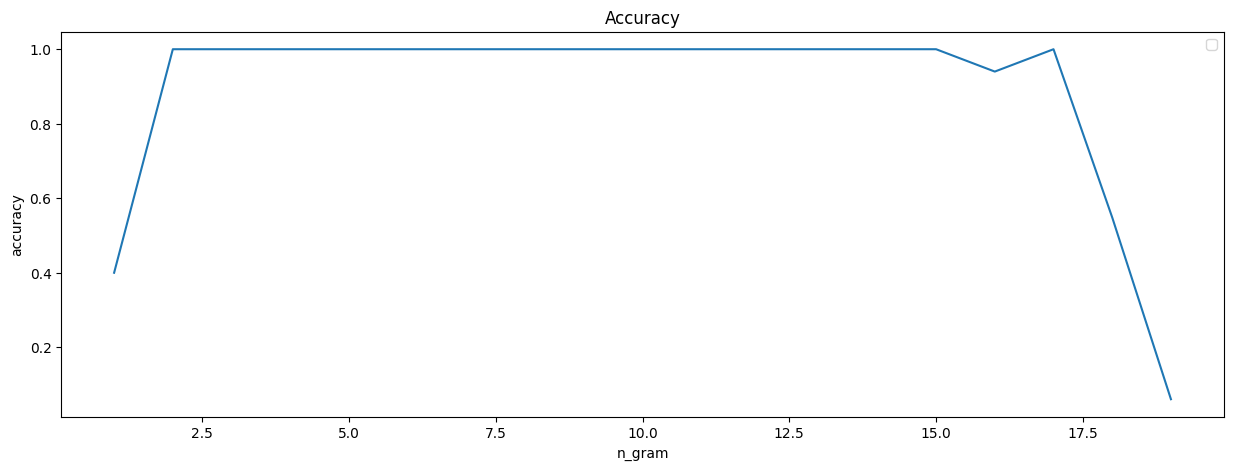

In [56]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, figsize=(15, 5))
axes.set_title("Accuracy")
axes.plot(n_grams_range, accuracy)
axes.set_xlabel("n_gram")
axes.set_ylabel("accuracy")
axes.legend()
plt.show()

Вывод: Точность распознования становаится 100% после 2х-грам, и падает после 16-грам, хотя есть подозрение, что если взять тестовый текст большего объёма, качество будет снижаться после большего значения n-грам.

6. Бонус: какие вы можете придумать применения для этой модели? Пляшущие человечки ведь не так часто встречаются в жизни (хотя встречаются! и это самое потрясающее во всей этой истории, но об этом я расскажу потом).

Можно использовать для расшифровки древних языков, которые имеют в основе заданный алфавит, но стоит проблема мапинга символов. Возможно придется перейти от букв к фонемам чтобы расширить алфавит современного русского языка.